# 统计计算


常见的统计函数有

**统计运算**|说明
---|---
sum|统计求和
mean|均值
average|加权求均值
median|中值
std|标准差
var|方差
min|最小值
argmin|最小值下标
max|最大值
argmax|最大值下标
ptp|最大值和最小值之差
sort|排序
argsort|排序下标
unique|找出所有整数(不会出现重复),并排序,</br>可选参数return_index=True,会额外返回一个记录下标的数组</br>可选return_inverse=True,会额外返回一个下标数组,数组长度为原始数组,表示原始数组中对应的下标
bincount|对整数数组个元素出现次数统计,可选参数weight,可以对各个元素加权


其中很多运算还有个`nanxxx`版本,用来求相应函数去掉nan值得结果

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 统计频数bincount

In [2]:
a = np.random.randint(0,5,10)
a

array([4, 4, 3, 3, 0, 0, 4, 0, 0, 0])

In [3]:
np.bincount(a)

array([5, 0, 0, 2, 3])

In [4]:
np.bincount(a,np.random.rand(10))

array([3.57475312, 0.        , 0.        , 0.42478611, 1.84216822])

## 相关性

numpy提供了3种算相关性的操作

+ `orrcoef(x, y=None, rowvar=1)` Pearson乘积矩相关系数。

其中rowvar=1表示向量是横置的,即每一列为向量的一个属性,每行是一个向量.为0则说明向量为竖置

In [5]:
np.corrcoef([[1,1,0,1,1],[0,1,0,1,1]])

array([[1.        , 0.61237244],
       [0.61237244, 1.        ]])

In [6]:
np.corrcoef([[1,1,0,1,1],[0,1,0,1,1]],rowvar=0)

/Users/huangsizhe/Lib/conda/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/huangsizhe/Lib/conda/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

### `correlate(a, v, mode='valid')`

两个1维序列的互相关.该函数计算信号处理文本中通常定义的相关性

$$ c_{av}[k] = sum_n a[n+k] * conj(v[n]) $$

其中a和v序列在必要时被填零,conj是共轭.mode可选{‘valid’, ‘same’, ‘full’}

In [7]:
np.correlate([1, 2, 3], [0, 1, 0.5])

array([3.5])

In [8]:
np.correlate([1, 2, 3], [0, 1, 0.5], "same")

array([2. , 3.5, 3. ])

In [9]:
np.correlate([1, 2, 3], [0, 1, 0.5], "full")

array([0.5, 2. , 3.5, 3. , 0. ])

### `cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None)`

估计协方差矩阵,给定数据和权重.协方差表示两个变量一起变化的水平.如果我们检查N维样本,则协方差矩阵元素$C_{ij}$是$x_i$和$x_j$的协方差.$C_{ii}$元素是$x_i$的方差.其中rowvar一样是代表向量的是横置还是竖置
    
    
在概率论和统计学中,协方差Cov(X,Y)用于衡量两个变量的总体误差.而方差是协方差的一种特殊情况,即当两个变量是相同的情况.

期望值分别为$E(X)=\mu$与$E(Y)=\nu$的两个实数随机变量X 与Y 之间的协方差定义为:


$$ Cov(X, Y) = E((X - \mu) (Y - \nu))$$

$$ Cov(X, Y) = E(X \cdot Y) - \mu \nu$$

协方差矩阵是一个矩阵,其每个元素是各个向量元素之间的协方差.是从标量随机变量到高维度随机向量的自然推广.

In [10]:
persontype=np.dtype({'names':['name','height','weight'],'formats':['S32','f','f']},align=True)
a = np.array([("Huang",175,70),("Hao",170,60),("Li",180,75)],dtype=persontype)
data = np.array([a["height"],a["weight"]])
data

array([[175., 170., 180.],
       [ 70.,  60.,  75.]], dtype=float32)

In [11]:
data_cov = np.cov(data)
data_cov #协方差矩阵

array([[25.        , 37.5       ],
       [37.5       , 58.33333333]])

In [12]:
#相关系数矩阵
data_corr = np.corrcoef(data)
data_corr 

array([[1.        , 0.98198051],
       [0.98198051, 1.        ]])

也就是说身高与体重相关系数高达98.19%

## 直方图

通常在统计分析中最常见的是使用直方图观察数据的分布,numpy中有函数直接支持这个操作

+ 直方图统计histogram

    最基础的直方图,计算一组数据各个区间中的数据统计

    用法:

    `histogram(a,bins=10,range=None,normed=False,weights=None)`

    其中

    + bin指定统计区间个数,

    + range是一个长为2的元组,分别表示统计范围的最小值和最大值(None表示由数据决定)

    + normed=False表示返回在每个区间的个数,为True则表示返回一个在各个区间的概率密度

    + weight表示权值和前面一样用法


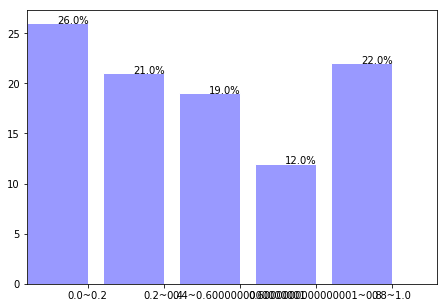

In [13]:
c = np.random.rand(100)
y,x = np.histogram(c,bins=5,range=(0,1))
xticks = [str(x[i])+'~'+str(x[i+1]) for i in range(len(y))]
plt.axes([0.025,0.025,0.95,0.95])
plt.bar(range(len(y)), y, facecolor='#9999ff', edgecolor='white')
for i,j in zip(range(len(y)), y):
    plt.text(i,j,str(float(y[i])/sum(y)*100)+"%")

plt.xlim(-0.4,5)
plt.xticks(np.arange(5)+0.4,xticks)
plt.show()

### `histogram2d(x, y[, bins, range, normed, weights])`

计算两个数据样本的二维直方图。

[[13. 14. 15. 16.]
 [ 9. 10. 11. 12.]
 [ 5.  6.  7.  8.]
 [ 1.  2.  3.  4.]]


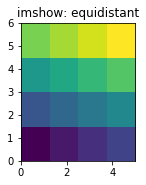

In [14]:
xedges = [0, 1, 1.5, 3, 5]
yedges = [0, 2, 3, 4, 6]
x = np.random.normal(3, 1, 100)
y = np.random.normal(1, 1, 100)
H, xedges, yedges = np.histogram2d(y, x, bins=(xedges, yedges))
H = np.ones((4, 4)).cumsum().reshape(4, 4)
print(H[::-1])
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131)
ax.set_title('imshow: equidistant')
im = plt.imshow(H, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

### `histogramdd(sample, bins=10, range=None, normed=False, weights=None)`

计算多维直方图

In [15]:
r = np.random.randn(100,3)
H, edges = np.histogramdd(r, bins = (5, 8, 4))
H.shape, edges[0].size, edges[1].size, edges[2].size

((5, 8, 4), 6, 9, 5)

### `digitize(x, bins, right=False)`

返回输入数组中每个值所属的bin的索引

In [16]:
x = np.array([0.2, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
inds

array([1, 4, 3, 2])

In [17]:
for n in range(x.size):
    print(bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]])

0.0 <= 0.2 < 1.0
4.0 <= 6.4 < 10.0
2.5 <= 3.0 < 4.0
1.0 <= 1.6 < 2.5


In [18]:
x = np.array([1.2, 10.0, 12.4, 15.5, 20.])
bins = np.array([0, 5, 10, 15, 20])
np.digitize(x,bins,right=True)

array([1, 2, 3, 4, 4])

In [19]:
np.digitize(x,bins,right=False)

array([1, 3, 3, 4, 5])